In [1]:
#!/usr/bin/env python
import dd
import matplotlib.pylab as plt
import numpy as np
from readStark import *
import matplotlib.cm as cm
from getsig import getsig
%load_ext autoreload
%autoreload 2
plt.style.use('helvet2')

In [2]:
def ddelmsync(shotnr, diag, signal, edition=0,
              ti=0.0, tf=10.0, preft=0.001, suft=0.004,
              elm_exper="AUGD", elm_edition=0):
    #################################
    ### Time Base ELM Sync:
    ### Gets a selected 1-D signal and syncs it to the ELMs in the desired time interval
    #################################
    ##Flag to check if data came from a signal group
    sgrp = False

    ###### Gets ELM data ############
    ELM = dd.shotfile("ELM", shotnr, experiment=elm_exper, edition=elm_edition)
    elmd = ELM("t_endELM", tBegin=ti, tEnd=tf)
    t_endELM = elmd.data
    t_begELM = elmd.time
    ELM.close()
    ################################
    #### Open with dd libraries ####
    ################################

    signal = getsig(shotnr, diag, signal, tBegin=ti, tEnd=tf, edition=edition)
    # Remove Offset (bolometers, etc)

    #################### Syncs the timebase to the ELM timebase     
    ###########################
    ###### Signal group
    ###########################
    syncsig = []#np.zeros_like(signal.data)
    synctime = []#np.zeros_like(signal.time)
        
    for elm in range(t_begELM.size):
        t1, t2 =t_begELM[elm]-preft, t_endELM[elm]+suft
        #Re-adjust ELM times so no overlap between consecutive ELMs occurs
        if (elm >=1 ) :
            tendprev = t_endELM[elm-1]                
            t1 = np.max([t1,tendprev])
        if  (elm<t_begELM.size-1):
            tstartnext =  t_begELM[elm+1]
            t2 = np.min([t2,tstartnext])

        elmind = np.where((signal.time >= t1) & (signal.time <=t2))
        #synctime.append(signal.time[elmind]-signal.time[elm])
        #syncsig.append(signal.data[elmind])
        #plt.scatter(signal.time[elmind]-t_begELM[elm], signal.data[elmind], color='k')
        
        synctime.append(signal.time[elmind]-t_begELM[elm])
        
        #Distinguish between 1D (signal) and 2D array (Signal group)
        if len(signal.data.shape)==1:
            syncsig.append(signal.data[elmind])
        elif len(signal.data.shape)==2:
            syncsig.append(signal.data[elmind,:])
        else:
            raise Exception('Array format not supported!')
        
    #Finally, return is again dependent on array dimensions
    if len(signal.data.shape)==1:
        return np.concatenate(synctime), np.concatenate(syncsig)
    if len(signal.data.shape)==2:
        return np.concatenate(synctime), np.concatenate(syncsig, axis=1)[0,:,:]

In [7]:
th, rh = ddelmsync(30554, 'RDL', 'HFSR', edition=3,
             ti=2.0, tf=3.0, preft=0.004, suft=0.016,
             elm_exper="AUGD")

In [114]:
np.shape(rh)

(309, 12)

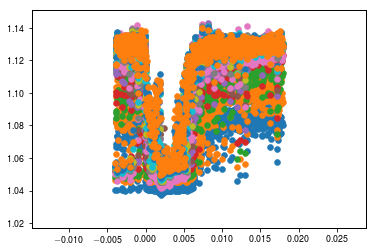

In [8]:
for i in range(12):
    plt.scatter(th,rh[:,i])
plt.show()

In [ ]:

    for chan in range(chanlen):
        syncsig[chan] = np.append(syncsig[chan], [sigdataT[chan,elmind][0]])

    return np.concatenate(synctime), syncsig
    ###########################
    ###### 1-D signal
    ###########################
    else:
        syncsig = []
        for elm in range(t_begELM.size):
            t1,t2 =  t_begELM[elm]-preft, t_endELM[elm]+suft

            if (elm >=1 ) :
                tendprev = t_endELM[elm-1]                
                t1 = np.max([t1,tendprev])
            if  (elm<t_begELM.size-1):
                tstartnext =  t_begELM[elm+1]
                t2 = np.min([t2,tstartnext])

            elmind = np.where((sigtime >= t1) & (sigtime <=t2))
            synctime.append(sigtime[elmind]-t_begELM[elm])
            syncsig.append(sigdata[elmind])
    #Concatenate all arrays so we have only a single array            
        if concatenate:
            return np.concatenate(synctime), np.concatenate(syncsig, axis=0)            
        else:
            return np.array(synctime), np.array(syncsig)

In [8]:
shotnr=30554
ti=1.8
tf=2.8
preft=0.002
suft=0.008
refside = 'out'
divside = refside
divitem = 'jsat'
elm_exper = "guimas"
mintime = -preft*1e3
maxtime = suft*1e3
refsgr = 'LFSR'
rdl_edition = 0

In [33]:
th, rh = sigelmsync(shotnr, "RDL", refsgr, edition=rdl_edition, ti=ti, tf=tf,
                        preft=preft, suft=suft, elm_exper=elm_exper, concatenate=False)

In [36]:
np.shape(rh)

(45,)

In [30]:
rrh = np.hstack(rh)

ValueError: all the input arrays must have same number of dimensions

In [32]:
for i in range(len(rh)):
#    plt.scatter(th, rh[i])
    print(len(rh[i]))
#plt.show()

365
365
365
365
365
365
365
365
365
365
365
365
0
11
12
11
11
11
12
11
11
11
12
11
11
11
11
12
11
11
12
12
11
12
12
12
12
12
12
12
11
12
12
12
8


In [ ]:
def selmsync(shotnr, diag, signal, edition=0,
             ti=0.0, tf=10.0, preft=0.001, suft=0.004,
             elm_exper="AUGD", offset=False,
             file=None, concatenate=True):
    #################################
    ### Time Base ELM Sync:
    ### Gets a selected 1-D signal and syncs it to the ELMs in the desired time interval
    #################################
    ##Flag to check if data came from a signal group
    sgrp = False

    ###### Gets ELM data ############
    ELM = dd.shotfile("ELM", shotnr, experiment=elm_exper)
    elmd = ELM("t_endELM", tBegin=ti, tEnd=tf)
    t_endELM = elmd.data
    t_begELM = elmd.time
    ELM.close()
    ##################################
    
    ##Gets the custom file, ignores diag and signal, but they must be set for the time being
    if file is not None:
        print "Reading from " + str(file)
        try:
            a = np.loadtxt(str(file))
        except:
            print "No such file: " + file
            raise

        ###Check what data we have in the file
        if (a.shape[1] > 2): #It's a Signal Group
            sigtime = a[:,0]
            sigdata = a[:,1:a.shape[1]-1]
        elif ( a.shape[1] == 2): #It's a 1-D signal, two columns
            sigtime = a[:,0]
            sigdata = a[:,1]
        else: #No idea
            print "Yeah, the file you chose is not ok..."
            print "Take a look at " + file
            raise ValueError
    else: ###Not from a file
        #### Open with dd libraries ############
        DIAG = dd.shotfile(diag, shotnr, edition=edition)
        SIG = DIAG(signal, tBegin=ti, tEnd=tf)
        sigtime = SIG.time
        sigdata = SIG.data
        if (len(SIG.data.shape) >1):
            if (SIG.data.shape[1] > 2):
                sgrp = True
        DIAG.close()
        #################################

    # Remove Offset (bolometers, etc)
    if (offset):
        nptsoff = 20
        if (sgrp): #If it's a Signal Group
            sumoff = 0
            for chan in range(len(sigdata[1,:])):
                sumoff = np.sum(sigdata[2:2+nptsoff-1, chan])/float(nptsoff)
                sigdata[:, chan] = sigdata[:, chan] - sumoff
        else:
            sumoff = np.sum(sigdata[2:2+nptsoff-1])/float(nptsoff)
            sigdata = sigdata - sumoff

    #################### Syncs the timebase to the ELM timebase 
    synctime = []
    ###########################
    ###### Signal group
    ###########################
    if sgrp:
        sigdataT = sigdata.T
        chanlen = len(sigdata[0, :])        
        #syncsig = list(chanlen)
        syncsig = [[]]*chanlen
        for elm in range(t_begELM.size):
            t1,t2 =  t_begELM[elm]-preft, t_endELM[elm]+suft

            if (elm >=1 ) :
                tendprev = t_endELM[elm-1]                
                t1 = np.max([t1,tendprev])
            if  (elm<t_begELM.size-1):
                tstartnext =  t_begELM[elm+1]
                t2 = np.min([t2,tstartnext])

            elmind = np.where((sigtime >= t1) & (sigtime <=t2))
            synctime.append(sigtime[elmind]-t_begELM[elm])
            syncsig.append(sigdata[elmind])
        
            for chan in range(chanlen):
                syncsig[chan] = np.append(syncsig[chan], [sigdataT[chan,elmind][0]])

        return np.concatenate(synctime), syncsig
    ###########################
    ###### 1-D signal
    ###########################
    else:
        syncsig = []
        for elm in range(t_begELM.size):
            t1,t2 =  t_begELM[elm]-preft, t_endELM[elm]+suft

            if (elm >=1 ) :
                tendprev = t_endELM[elm-1]                
                t1 = np.max([t1,tendprev])
            if  (elm<t_begELM.size-1):
                tstartnext =  t_begELM[elm+1]
                t2 = np.min([t2,tstartnext])

            elmind = np.where((sigtime >= t1) & (sigtime <=t2))
            synctime.append(sigtime[elmind]-t_begELM[elm])
            syncsig.append(sigdata[elmind])
    #Concatenate all arrays so we have only a single array            
        if concatenate:
            return np.concatenate(synctime), np.concatenate(syncsig, axis=0)            
        else:
            return np.array(synctime), np.array(syncsig)

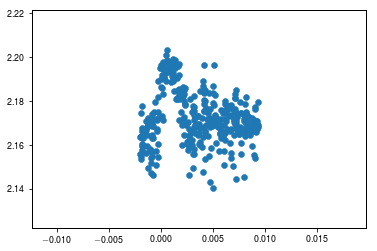

In [27]:
plt.scatter(th, rh[1])
plt.show()